In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [44]:
cars = pd.read_csv("car data.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [47]:
cars.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


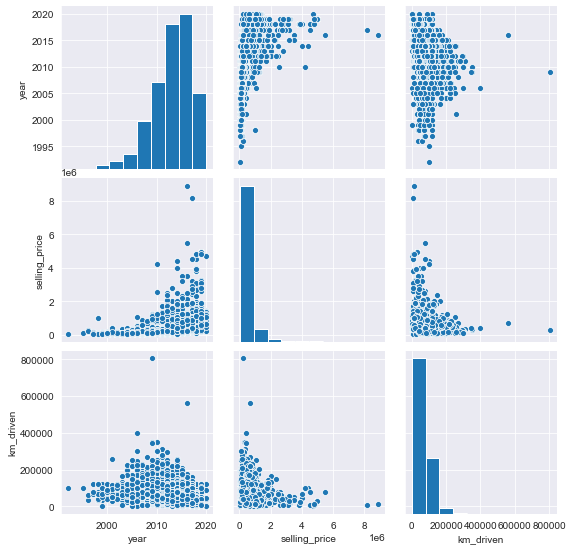

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [48]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [50]:
cars.shape

(301, 9)

In [55]:
cars.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [56]:
cars.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [57]:
cars.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [59]:
cars=cars.drop(columns=['Car_Name'])

In [60]:
dummies = pd.get_dummies(cars,drop_first=True)
dummies

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


In [65]:
X=dummies.drop('Selling_Price',axis=1)
y=dummies['Selling_Price']
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1


In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std = ss.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

In [67]:
import statsmodels.api as sm
Xc=sm.add_constant(X_std)
ols=sm.OLS(y,Xc)
model=ols.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          5.71e-131
Time:                        13:09:49   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.6613      0.102     45.807      0.000       4.461       4.862
Year                       1.1347      0.124      9.159      0.000       0.891       1.379
Present_Price              3.7727      0.138     27.355      0.000       3.501       4.044
Kms_Driven                -0.2723      0.125     -2.172      0.031      -0.519      -0.026
Owner                     -0.1669      0.105     -1.595      0.112      -0.373       0.039
Fuel_Type_Diesel           0.9867      0.511      1.932      0.054      -0.018       1.992
Fuel_Type_Petrol           0.2457      0.509      0.483      0.630      -0.756       1.248
Seller_Type_Individual    -0.5356      0.123     -4.371      0.000      -0.777      -0.294
Transmission_Manual       -0.4916      0.111     -4.417      0.000      -0.711      -0.273
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
y_pred=model.predict(Xc)


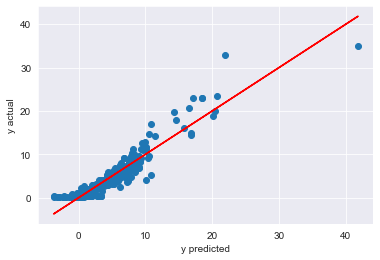

In [70]:
plt.scatter(y_pred,y)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_std.values,i) for i in range(X_std.shape[1])]
vif['feature']=X_std.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
4,25.182719,Fuel_Type_Diesel
5,25.026007,Fuel_Type_Petrol
1,1.836927,Present_Price
2,1.517916,Kms_Driven
0,1.482347,Year
6,1.449644,Seller_Type_Individual
7,1.196263,Transmission_Manual
3,1.056734,Owner


In [72]:
X_vif=X_std.copy()
while vif['VIF'].max()>10:
    a=vif[vif['VIF']==vif['VIF'].max()].iloc[0,1]
    X_vif=X_vif.drop(a,axis=1)
    
    vif=pd.DataFrame()
    vif['VIF']=[variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['feature']=X_vif.columns
vif


,VIF,feature
0,1.479069,Year
1,1.817777,Present_Price
2,1.516875,Kms_Driven
3,1.056732,Owner
4,1.364677,Fuel_Type_Petrol
5,1.445964,Seller_Type_Individual
6,1.196257,Transmission_Manual


In [74]:
import statsmodels.formula.api as smf 
model = smf.ols('Selling_Price~Present_Price+Kms_Driven+Owner+Fuel_Type_Petrol+Seller_Type_Individual+Transmission_Manual',data=dummies).fit()

In [75]:
model.params

Intercept                 5.997592
Present_Price             0.431185
Kms_Driven               -0.000023
Owner                    -1.240681
Fuel_Type_Petrol         -2.184964
Seller_Type_Individual   -1.228199
Transmission_Manual      -1.792518
dtype: float64

In [76]:
print(model.tvalues, '\n', model.pvalues)

Intercept                 10.596044
Present_Price             23.855832
Kms_Driven                -7.439212
Owner                     -2.604575
Fuel_Type_Petrol          -6.607644
Seller_Type_Individual    -4.215310
Transmission_Manual       -4.830429
dtype: float64 
 Intercept                 1.964379e-22
Present_Price             1.007157e-70
Kms_Driven                1.120040e-12
Owner                     9.666444e-03
Fuel_Type_Petrol          1.830580e-10
Seller_Type_Individual    3.323172e-05
Transmission_Manual       2.195976e-06
dtype: float64


In [77]:
(model.rsquared,model.rsquared_adj)

(0.8465889392328394, 0.8434581012579994)

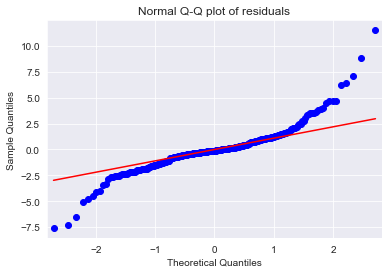

In [78]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

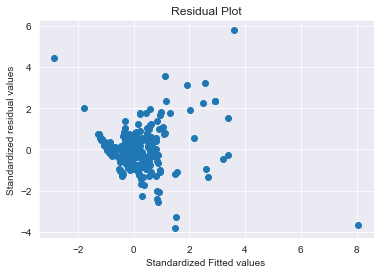

In [80]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [82]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-83-dc32c8f8fc4c>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)), np.round(c, 3))


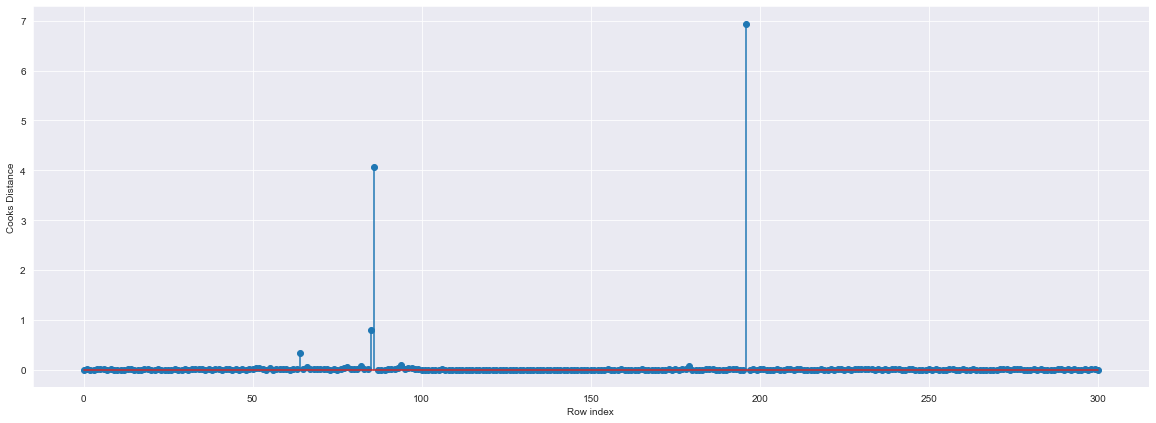

In [83]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
(np.argmax(c),np.max(c))

(196, 6.9464527564198955)

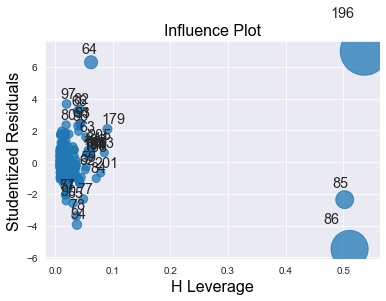

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [86]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [87]:
dummies[dummies.index.isin([196, 86,85,64])]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
64,2017,33.00,36.23,6000,0,1,0,0,0
85,2006,2.50,23.73,142000,3,0,1,1,0
86,2010,35.00,92.60,78000,0,1,0,0,1
196,2008,0.17,0.52,500000,0,0,1,1,0


In [88]:
dummies.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [92]:
car1=dummies.drop(dummies.index[[70,76]],axis=0).reset_index()

In [93]:
car1.head()

,index,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,2014,3.35,5.59,27000,0,0,1,0,1
1,1,2013,4.75,9.54,43000,0,1,0,0,1
2,2,2017,7.25,9.85,6900,0,0,1,0,1
3,3,2011,2.85,4.15,5200,0,0,1,0,1
4,4,2014,4.60,6.87,42450,0,1,0,0,1


In [94]:
car1.shape

(299, 10)

In [96]:
y = car1['Selling_Price']
X =car1.drop(columns = ['Selling_Price'])

In [97]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [99]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [101]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [102]:
regression.score(x_train,y_train)

0.8882822197352693

In [103]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [104]:
adj_r2(x_train,y_train)

0.8835838084157246

In [105]:
regression.score(x_test,y_test)

0.8525435025191437

In [106]:
adj_r2(x_test,y_test)

0.8321264490217943

In [107]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [108]:
alpha = lasscv.alpha_
alpha

0.01826197494260522

In [109]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.01826197494260522)

In [110]:
lasso_reg.score(x_test, y_test)

0.8544343955113197

In [111]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([7.58232493, 6.81886817, 5.35182942, 8.79604142, 6.32222103,
       8.41391074, 1.4420085 , 1.24007086, 3.47285805, 1.92565882,
       3.31929162, 6.42005345, 3.33542004, 9.27482384, 2.22193292,
       8.45766216, 6.20422433, 4.05905489, 9.97424381, 3.64027396,
       3.60459737, 1.75920456, 8.10044818, 8.07644179, 9.17982562,
       7.38710531, 1.05477735, 2.84983858, 6.04294069, 4.58175045,
       2.63106334, 9.6776445 , 0.26484462, 7.0510108 , 4.78184332,
       9.38731711, 7.88904269, 3.73427289, 1.48620523, 7.57381688,
       2.17127923, 0.04946741, 2.3193428 , 1.9360697 , 0.20106948,
       9.46423878, 4.10367232, 2.7336289 , 3.18550081, 0.62130916]),
        cv=10, normalize=True)

In [112]:
ridgecv.alpha_

0.04946740656070814

In [113]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.04946740656070814)

In [114]:
ridge_model.score(x_test, y_test)

0.8525455883513012

In [115]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [116]:
elasticCV.alpha_

0.19212363258237053

In [117]:
elasticCV.l1_ratio

0.5

In [118]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.19212363258237053)

In [119]:
elasticnet_reg.score(x_test, y_test)

0.8405159666457566